In [ ]:
# http://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.


'''

Mostly binary set of data, to predict who has diabetes based on early signs. 

I experimented with the Pipeline and ColumnTransformer from scikit learn here. Then running cross validation on top of that.

Best model was a random forest that yielded 97.4% accuracy. 

'''

In [225]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime 

from sklearn import preprocessing 


In [242]:
filename_prefix = 'C://Users/Tim/Downloads/diabetes_data_upload.csv'

dataDF = pd.read_csv(filename_prefix)

In [243]:
dataDF

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [228]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [263]:
categorical_cols = list(dataDF.columns)[1:]
categorical_cols

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [265]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

In [267]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): [0, 1]

In [317]:


num_cols = list(dataDF.columns)[:1]
numerical_transformer = Pipeline(steps=[('identity',preprocessing.FunctionTransformer())])


categorical_cols = [c for c in list(dataDF.columns)[1:] if (c != 'class')]
categorical_transformer = Pipeline(steps=[('ordinal',preprocessing.OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, num_cols), ('cat', categorical_transformer, categorical_cols)])


clf = Pipeline(steps=[('preprocessor', preprocessor), #('pca', decomposition.PCA()),
                      ('classifier', ensemble.RandomForestClassifier())])


dataDF_trans = preprocessor.fit_transform(dataDF)

In [300]:
dataDF_trans

array([[40.,  1.,  0., ...,  1.,  1.,  1.],
       [58.,  1.,  0., ...,  0.,  1.,  0.],
       [41.,  1.,  1., ...,  1.,  1.,  0.],
       ...,
       [58.,  0.,  1., ...,  1.,  0.,  1.],
       [32.,  0.,  0., ...,  0.,  1.,  0.],
       [42.,  1.,  0., ...,  0.,  0.,  0.]])

In [318]:
feat_cols = [c for c in dataDF.columns if (c != 'class')]
Xy = dataDF #[feat_cols + ['class']]

#X_arr = np.array(Xy.drop(columns = ['class']))
#Y_arr = np.array(Xy['class'])

X_arr = Xy.drop(columns = ['class'])
Y_arr = Xy['class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_arr, Y_arr, test_size=0.60, random_state=42)

In [319]:


clf.fit(X_train, y_train)
#print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('identity',
                                                                   FunctionTransformer())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                 

In [320]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.974


In [311]:
parameters = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [5, 10, 15]}
model =  ensemble.RandomForestClassifier()
cv_ = model_selection.GridSearchCV(clf, parameters, cv = model_selection.KFold(n_splits = 4))
 
cv_.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('identity',
                                                                                          FunctionTransformer())]),
                                                                         ['Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder())]),
                                                                         ['Gender',
                                                                          'Polyuria',
                                

In [312]:
cv_.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('identity',
                                                                   FunctionTransformer())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                 

In [313]:
cv_.best_score_

0.9423076923076923

In [321]:
y_pred = clf.predict(X_test)

In [322]:
from sklearn import metrics

print (metrics.confusion_matrix(y_test, y_pred))
metrics.precision_recall_fscore_support(y_test, y_pred)

[[118   2]
 [  6 186]]


(array([0.9516129, 0.9893617]),
 array([0.98333333, 0.96875   ]),
 array([0.96721311, 0.97894737]),
 array([120, 192], dtype=int64))

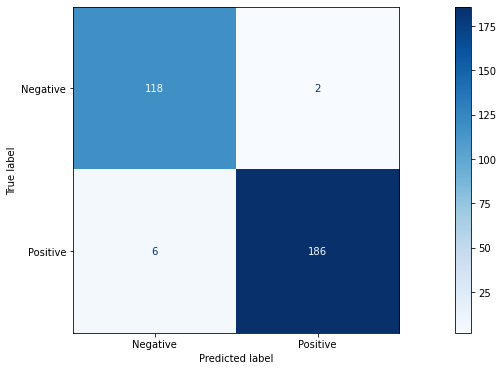

In [323]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [283]:
dataDF_trans

array([[40., 16.],
       [58., 34.],
       [41., 17.],
       ...,
       [58., 34.],
       [32.,  8.],
       [42., 18.]])

In [282]:
transDF = pd.DataFrame(dataDF_trans, columns = dataDF.columns)

transDF

ValueError: Shape of passed values is (520, 2), indices imply (520, 17)

In [234]:
dataDF['Gender'].dtypes.str

'|O'

In [27]:
enc = preprocessing.OrdinalEncoder()

dataDF_trans = dataDF
cols = list(dataDF.columns)[1:]
dataDF_trans[cols] = enc.fit_transform(dataDF_trans[cols])

In [28]:
dataDF_trans


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
516,48,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
517,58,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
518,32,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
dataDF[cols] = enc.inverse_transform(dataDF[cols])

dataDF

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender_enc
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1.0
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1.0
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1.0
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1.0
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive,0.0
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive,0.0
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive,0.0
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative,0.0


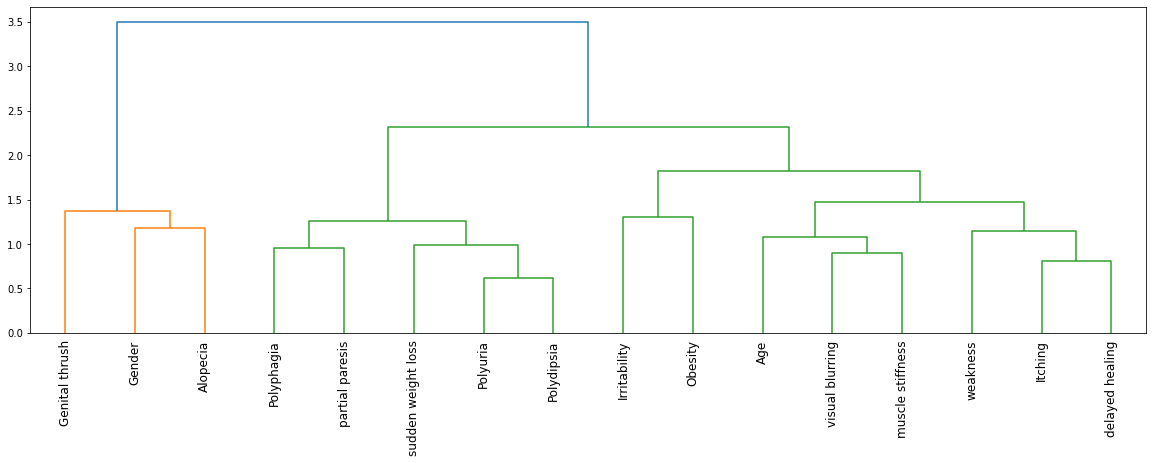

In [118]:

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

X= dataDF_trans.drop(columns = ['class'])
corr = spearmanr(X).correlation

corr_linkage = hierarchy.ward(corr)

from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

dendro = hierarchy.dendrogram(
    corr_linkage, labels=X.columns.tolist(), leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

In [119]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

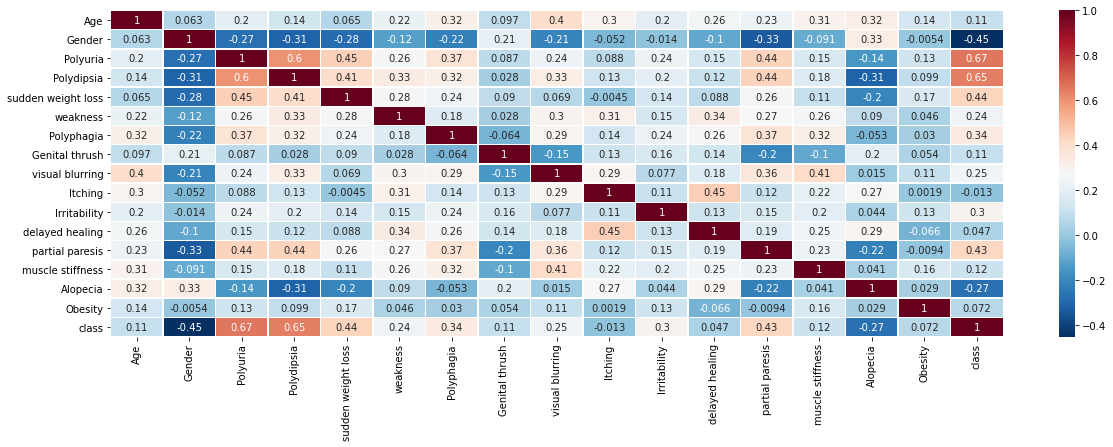

In [38]:
import seaborn as sb

pearsoncorr = X.corr(method='pearson')

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [97]:
selected_features = dataDF_trans.columns[:-1]

In [47]:
dataDF_trans.columns[1]

'Gender'

In [120]:
feat_cols = [dataDF_trans.columns[i] for i in selected_features]
#feat_cols = [c for c in dataDF_trans.columns if (c != 'class')]

In [121]:
from sklearn import tree, ensemble, neighbors, neural_network, model_selection

#Xy = dataDF_trans[[dataDF_trans.columns[i] for i in selected_features] + ['class']]
Xy = dataDF_trans[feat_cols + ['class']]

X_arr = np.array(Xy.drop(columns = ['class']))
Y_arr = np.array(Xy['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_arr, Y_arr, test_size=0.60, random_state=42)

In [215]:
# clf = tree.DecisionTreeClassifier(max_depth = 13)  -- 95.2% 
# clf = tree.DecisionTreeClassifier(max_depth = 13) -- 95.2% with all features 

clf = ensemble.RandomForestClassifier()  #-- 96.0% 

# clf = neighbors.KNeighborsClassifier(n_neighbors = 3, weights = 'distance') -- 84%

clf.fit(X_train, y_train)



RandomForestClassifier()

In [216]:
predict = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

0.967948717948718

In [217]:
from sklearn import metrics

print (metrics.confusion_matrix(y_test, predict))
metrics.precision_recall_fscore_support(y_test, predict)

[[117   3]
 [  7 185]]


(array([0.94354839, 0.98404255]),
 array([0.975     , 0.96354167]),
 array([0.95901639, 0.97368421]),
 array([120, 192], dtype=int64))

In [134]:
feat_impDF = pd.DataFrame(zip(feat_cols, clf.feature_importances_), columns = ['feature', 'importance'])

feat_impDF.sort_values('importance', ascending = False)

,feature,importance
2,Polyuria,0.307306
0,Age,0.186245
1,Gender,0.163467
9,Alopecia,0.054305
6,visual blurring,0.047965
3,weakness,0.046230
7,Itching,0.044012
4,Polyphagia,0.041265
8,Irritability,0.040631
5,Genital thrush,0.038197


In [207]:
# CROSS VALIDATION 

parameters = {'n_neighbors': [2, 3, 5, 10], 'weights': ['uniform', 'distance']}
model =  neighbors.KNeighborsClassifier()
clf = model_selection.GridSearchCV(model, parameters, cv = model_selection.KFold(n_splits = 4))
 
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 10],
                         'weights': ['uniform', 'distance']})

In [208]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [209]:
clf.cv_results_['rank_test_score']

array([7, 3, 5, 1, 6, 2, 8, 4])

In [210]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [211]:
clf.best_score_

0.8365384615384615

In [221]:
from sklearn.inspection import permutation_importance

r = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=0)

perm_cols = []
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        perm_cols += [feat_cols[i]]
        print(f"{list(feat_cols)[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

Polyuria0.233 +/- 0.016
Gender  0.104 +/- 0.012
Alopecia0.054 +/- 0.011
Age     0.039 +/- 0.006
Irritability0.038 +/- 0.009
Itching 0.021 +/- 0.004
weakness0.019 +/- 0.006
visual blurring0.015 +/- 0.006
Obesity 0.015 +/- 0.006
Genital thrush0.011 +/- 0.004


In [220]:
feat_cols


['Age',
 'Gender',
 'Polyuria',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'Alopecia',
 'Obesity']

In [223]:
[c for c in feat_cols if (c not in perm_cols)]

['Polyphagia']